In [1]:
# Loaded imp libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Applications/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Loaded data
df = pd.read_csv('/Users/mh/Desktop/DS_Task/loangrant.csv')
# review 1st 10 rows to understand data
df.head(10)

/var/folders/3z/gjs8159j4pj4fhckh__lk6g00000gn/T/ipykernel_29283/653416114.py:2: DtypeWarning: Columns (10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/mh/Desktop/DS_Task/loangrant.csv')


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0
5,7e9f6759-6a13-48ef-adfa-ef9fbcfcfcc8,05301ee5-29ec-48b6-b3e5-0813ea25d684,Charged Off,11911,Short Term,7420.0,2 years,Home Mortgage,70475.0,other,886.81,17.7,NaN,13,0,28212,59897,0.0,0.0
6,c2b0aa3e-555b-441b-a4aa-e0e4a52c87d3,db3e74ec-2123-4608-be8d-a93e98cabfcf,Charged Off,28988,Short Term,7420.0,3 years,Home Mortgage,58074.0,Debt Consolidation,871.11,22.8,NaN,9,0,14423,54018,0.0,0.0
7,233e0119-6dfe-47c0-a212-b4cc00371c8d,def66e46-951e-4bff-bf96-87ae6e092e19,Charged Off,17705,Long Term,6630.0,3 years,Own Home,49180.0,Debt Consolidation,274.59,30.2,NaN,10,1,4252,25012,1.0,0.0
8,fc9d109b-15c2-4fe3-b7d8-27610b89f80b,f54c53e4-acd7-4e29-8f55-d2a247a4b62a,Charged Off,16812,Short Term,7360.0,7 years,Rent,50945.0,Debt Consolidation,590.12,14.6,NaN,9,0,12903,15379,0.0,0.0
9,35ee60ed-df2d-4d3a-98ba-03d944d65c74,93cbb4b9-4e88-4b93-8beb-a2a00d415cd5,Charged Off,9796,Long Term,6720.0,< 1 year,Rent,58776.0,Debt Consolidation,666.13,9.4,17.0,12,0,4939,15198,0.0,0.0


In [3]:
df.info()  # get over all summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  89769 non-null   float64
 6   Years in current job          106414 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 89769 non-null   float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  object 
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  52104 non-null

# Univarate Analysis

In [4]:
df['Credit Score'].describe()  # Summary of column

count    89769.000000
mean      1075.795029
std       1474.133505
min        585.000000
25%        705.000000
50%        724.000000
75%        741.000000
max       7510.000000
Name: Credit Score, dtype: float64

In [5]:
# find median of this col
median_score = df['Credit Score'].median()

In [6]:
# filling Null vales with median
df['Credit Score'] = df['Credit Score'].fillna(median_score)

In [7]:
# Make sure that no Null value left
df['Credit Score'].isnull().sum()

0

In [8]:
df['Credit Score'].describe()  # check the effect of filling values

count    111107.000000
mean       1008.233109
std        1332.266216
min         585.000000
25%         711.000000
50%         724.000000
75%         738.000000
max        7510.000000
Name: Credit Score, dtype: float64

In [9]:
q1 = np.percentile(df['Credit Score'], 0.25)  # find Q1
q3 = np.percentile(df['Credit Score'], 0.75)  # find Q2
iqr = q3-q1  # find IQR

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

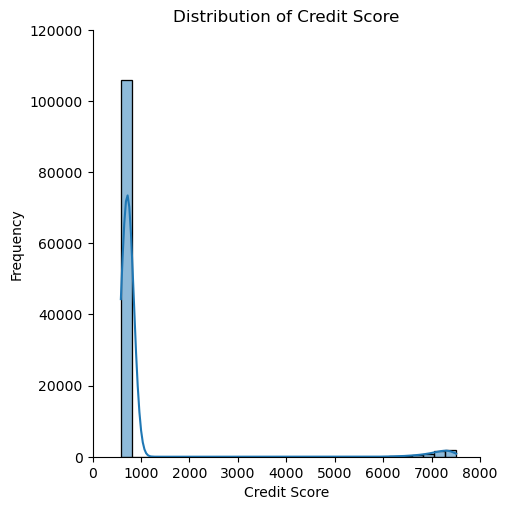

In [10]:

plt.figure(figsize=(8, 6))  # give the size to figure

# displot for checking the skewness of data
sns.displot(df['Credit Score'], bins=30, kde=True)
plt.xlim(0, 8000)  # Set custom limits for the x-axis
plt.ylim(0, 120000)  # Set custom limits for the y-axis

plt.title('Distribution of Credit Score')  # title of fig
plt.xlabel('Credit Score')  # title of x axis
plt.ylabel('Frequency')     # title of y axis
plt.show()  # to display the plot

<Axes: >

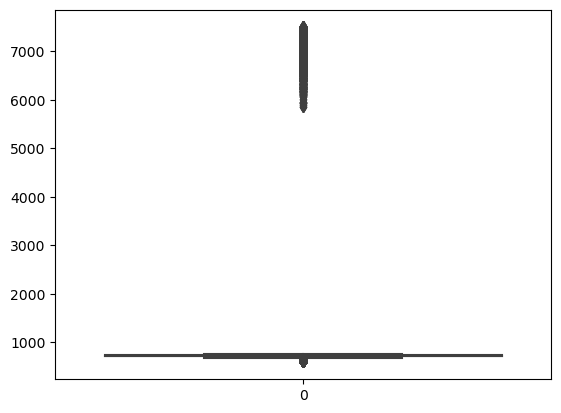

In [11]:
sns.boxplot(df['Credit Score'])  # found outliers

In [12]:
q1 = df['Credit Score'].quantile(0.25)
q3 = df['Credit Score'].quantile(0.75)
iqr = q3-q1
print('Q1 : ', q1)
print('Q2 : ', q3)
print('IQR: ', iqr)

Q1 :  711.0
Q2 :  738.0
IQR:  27.0


In [13]:
upper_limit = q3 + (1.5*iqr)  # find upper and lower limit
lower_limit = q1 - (1.5*iqr)
print(upper_limit, lower_limit)

778.5 670.5


In [14]:
# replace the outlier with median
df['Credit Score'] = np.where(
    df['Credit Score'] > upper_limit, median_score, df['Credit Score'])
df.loc[df['Credit Score'] < 710, 'Credit Score'] = median_score

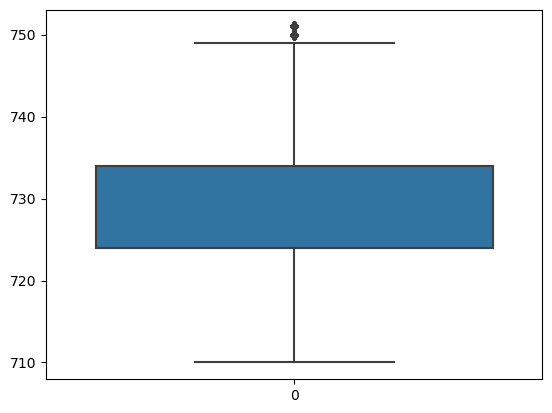

In [15]:
sns.boxplot(df['Credit Score'])
plt.show()

In [16]:
df['Annual Income'].describe()

count    8.976900e+04
mean     7.248600e+04
std      5.593094e+04
min      4.033000e+03
25%      4.468800e+04
50%      6.175200e+04
75%      8.688700e+04
max      8.713547e+06
Name: Annual Income, dtype: float64

In [17]:
df['Annual Income'].isnull().sum()  # find the null values

21338

In [18]:
# filling the Null values with
df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].median())

In [19]:
df['Annual Income'].describe()

count    1.111070e+05
mean     7.042454e+04
std      5.045158e+04
min      4.033000e+03
25%      4.901000e+04
50%      6.175200e+04
75%      7.961600e+04
max      8.713547e+06
Name: Annual Income, dtype: float64

In [20]:
df['Annual Income'].isna().sum()

0

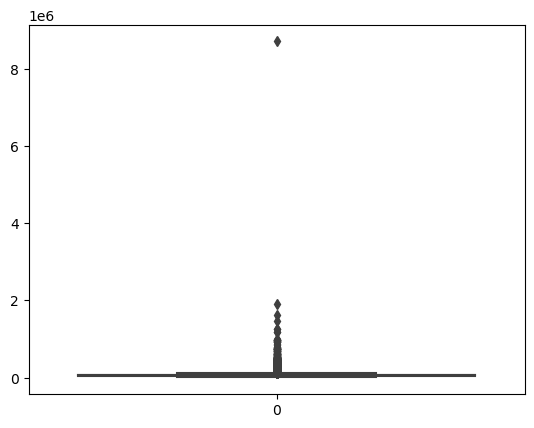

In [21]:
sns.boxplot(df['Annual Income'])
plt.show()

In [22]:
q1_ = df['Annual Income'].quantile(0.25)
q3_ = df['Annual Income'].quantile(0.75)
iqr_ = q3_-q1_

In [23]:
q1_, q3_, iqr_

(49010.0, 79616.0, 30606.0)

In [24]:
upper_lmt = q3_ + (1.5*iqr)
lower_lmt = q1_ - (1.5*iqr)
print(upper_lmt, lower_lmt)

79656.5 48969.5


In [25]:
df['Annual Income'] = np.where(
    df['Annual Income'] > 105000, median_score, df['Annual Income'])

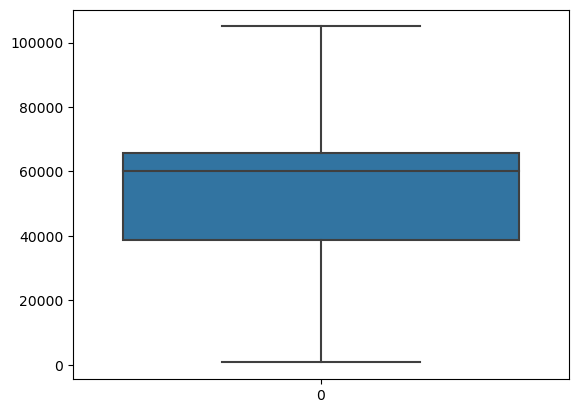

In [26]:
sns.boxplot(df['Annual Income'])
plt.show()

In [27]:
df['Months since last delinquent'].describe()

count    52104.000000
mean        34.902272
std         21.970696
min          0.000000
25%         16.000000
50%         32.000000
75%         51.000000
max        176.000000
Name: Months since last delinquent, dtype: float64

In [28]:
df['Months since last delinquent'].isnull().sum()

59003

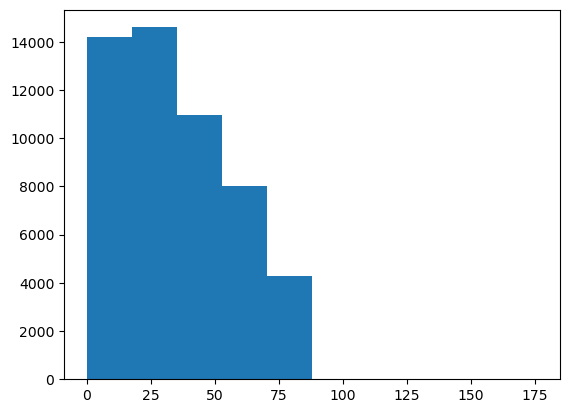

In [29]:
plt.hist(df['Months since last delinquent'])
plt.show()

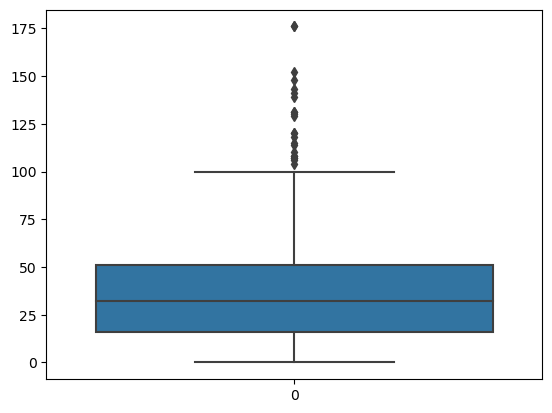

In [30]:
sns.boxplot(df['Months since last delinquent'])
plt.show()

In [31]:
q1_m = df['Months since last delinquent'].quantile(0.25)
q3_m = df['Months since last delinquent'].quantile(0.75)
iqr_m = q3_m-q1_m

In [32]:
df['Months since last delinquent'].describe()

count    52104.000000
mean        34.902272
std         21.970696
min          0.000000
25%         16.000000
50%         32.000000
75%         51.000000
max        176.000000
Name: Months since last delinquent, dtype: float64

In [33]:
df['Months since last delinquent'].isnull().sum()

59003

In [34]:
q1_m, q3_m, iqr_m

(16.0, 51.0, 35.0)

In [35]:
up_lmt = q3_m + (1.5*iqr_m)
l_lmt = q1_m - (1.5*iqr_m)
print(up_lmt, l_lmt)

103.5 -36.5


In [36]:
median_m = df['Months since last delinquent'].median()

In [37]:
# The impact of median on this col was bad that is why I used linear method to approxemate the missing values
df['Months since last delinquent'] = df['Months since last delinquent'].interpolate(
    method='linear')

# df['Months since last delinquent'] = df['Months since last delinquent'].fillna(median_m)

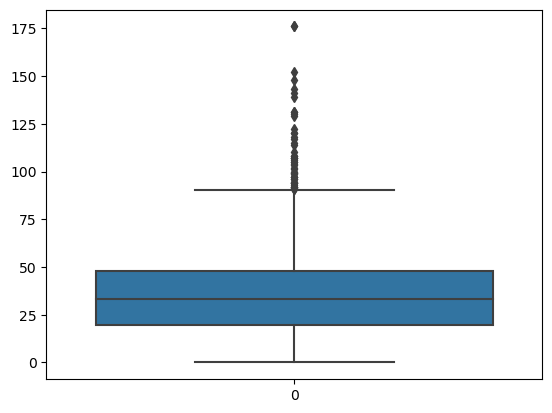

In [38]:
sns.boxplot(df['Months since last delinquent'])
plt.show()

In [39]:
q1_m = df['Months since last delinquent'].quantile(0.25)
q3_m = df['Months since last delinquent'].quantile(0.75)
iqr_m = q3_m-q1_m

In [40]:
q1_m, q3_m, iqr_m

(19.5, 48.0, 28.5)

In [41]:
up_lmt = q3_m + (1.5*iqr_m)
l_lmt = q1_m - (1.5*iqr_m)
print(up_lmt, l_lmt)

90.75 -23.25


In [42]:
# repalcing outliers with median
df['Months since last delinquent'] = np.where(
    df['Months since last delinquent'] > up_lmt, median_m, df['Months since last delinquent'])

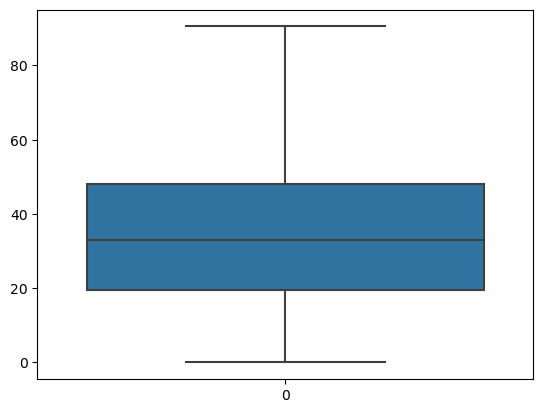

In [43]:
sns.boxplot(df['Months since last delinquent'])
plt.show()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  111107 non-null  float64
 6   Years in current job          106414 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 111107 non-null  float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  object 
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  111107 non-nul

In [45]:
df['Bankruptcies'].describe()

count    110879.00000
mean          0.11766
std           0.35142
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           7.00000
Name: Bankruptcies, dtype: float64

In [46]:
df['Bankruptcies'].value_counts()

Bankruptcies
0.0    98650
1.0    11613
2.0      468
3.0      110
4.0       27
5.0        8
6.0        2
7.0        1
Name: count, dtype: int64

In [47]:
df['Bankruptcies'].isnull().sum()

228

In [48]:
# there are very less missing values so I'm gonna fill with zero
df['Bankruptcies'] = df['Bankruptcies'].fillna(0.0)

(array([9.8878e+04, 1.1613e+04, 4.6800e+02, 0.0000e+00, 1.1000e+02,
        2.7000e+01, 0.0000e+00, 8.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

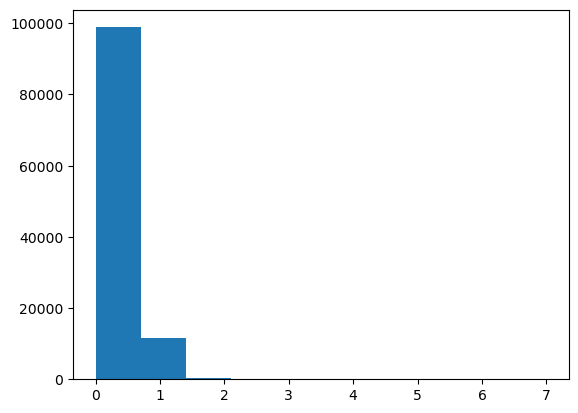

In [49]:
plt.hist(df['Bankruptcies'])

<Axes: >

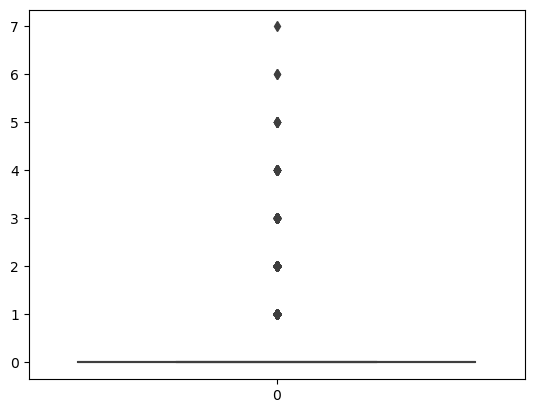

In [50]:
sns.boxplot(df['Bankruptcies'])

In [51]:
Q1_b = df['Bankruptcies'].quantile(0.25)
Q3_b = df['Bankruptcies'].quantile(0.75)
IQR = Q3_b - Q1_b

In [52]:
upper_limit_b = Q3_b+(1.5*IQR)
lower_limit_b = Q1_b-(1.5*IQR)

In [53]:
upper_limit_b, lower_limit_b

(0.0, 0.0)

In [54]:
df['Bankruptcies'] = np.where(df['Bankruptcies'] > 1, 1, df['Bankruptcies'])

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Bankruptcies', ylabel='Count'>

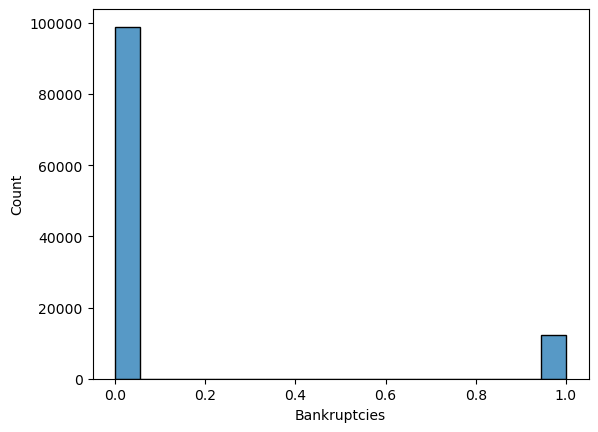

In [55]:
sns.histplot(df['Bankruptcies'])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  111107 non-null  float64
 6   Years in current job          106414 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 111107 non-null  float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  object 
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  111107 non-nul

In [57]:
df['Tax Liens'].describe()

count    111096.000000
mean          0.029353
std           0.260575
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          15.000000
Name: Tax Liens, dtype: float64

In [58]:
df['Tax Liens'].isnull().sum()

11

In [59]:
df['Tax Liens'].value_counts()

Tax Liens
0.0     108964
1.0       1485
2.0        408
3.0        124
4.0         66
5.0         19
6.0         12
7.0          7
9.0          5
8.0          2
11.0         2
15.0         1
10.0         1
Name: count, dtype: int64

In [60]:
# max values are zero so I filled with zero
df['Tax Liens'] = df['Tax Liens'].fillna(0.0)

In [61]:
df['Tax Liens'].isnull().sum()

0

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  111107 non-null  float64
 6   Years in current job          106414 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 111107 non-null  float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  object 
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  111107 non-nul

In [63]:
df['Years in current job'].isna().sum()

4693

In [64]:
df['Years in current job'].value_counts()

Years in current job
10+ years    34551
2 years      10158
3 years       9133
< 1 year      9055
5 years       7559
1 year        7175
4 years       6828
6 years       6310
7 years       6186
8 years       5105
9 years       4354
Name: count, dtype: int64

In [65]:

mode_value = df['Years in current job'].mode()[0]
df['Years in current job'] = df['Years in current job'].fillna(mode_value)

In [66]:
df['Years in current job'].value_counts()

Years in current job
10+ years    39244
2 years      10158
3 years       9133
< 1 year      9055
5 years       7559
1 year        7175
4 years       6828
6 years       6310
7 years       6186
8 years       5105
9 years       4354
Name: count, dtype: int64

In [67]:
df['Years in current job'].isna().sum()

0

In [68]:
df['Years in current job'].head()

0     < 1 year
1    10+ years
2      9 years
3      3 years
4    10+ years
Name: Years in current job, dtype: object

In [69]:
rep_dict = {
    '10+ years': 'Name of new level 5',
    '8 years': 'Name of new level 4',
    '9 years': 'Name of new level 4',
    '2 years': 'Name of new level 2',
    '3 years': 'Name of new level 2',
    '4 years': 'Name of new level 2',
    '5 years': 'Name of new level 3',
    '6 years': 'Name of new level 3',
    '7 years': 'Name of new level 3',
    '1 year': 'Name of new level 2',
    '< 1 year': 'Name of new level 1',

}

df['Years in current job'] = df['Years in current job'].replace(
    rep_dict)

In [70]:
df['Years in current job'].head(10)

0    Name of new level 1
1    Name of new level 5
2    Name of new level 4
3    Name of new level 2
4    Name of new level 5
5    Name of new level 2
6    Name of new level 2
7    Name of new level 2
8    Name of new level 3
9    Name of new level 1
Name: Years in current job, dtype: object

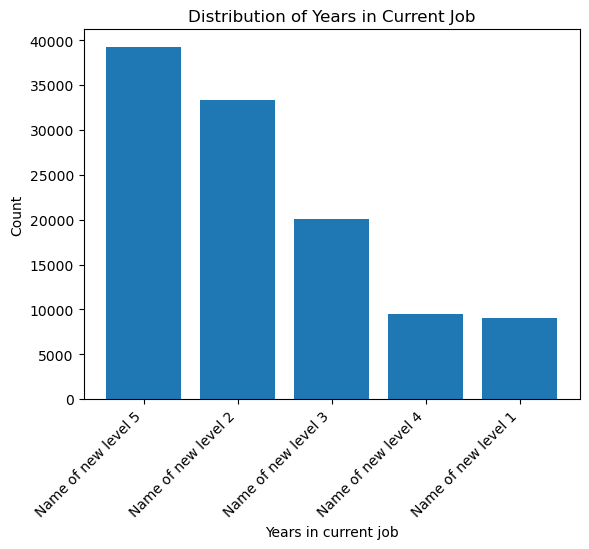

In [71]:
# This is categorical col so I use bar plot to display data

value_counts = df['Years in current job'].value_counts()
plt.bar(value_counts.index, value_counts)
plt.xlabel('Years in current job')
plt.ylabel('Count')
plt.title('Distribution of Years in Current Job')


# ha='right' ensures that the labels are right-aligned
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
plt.show()

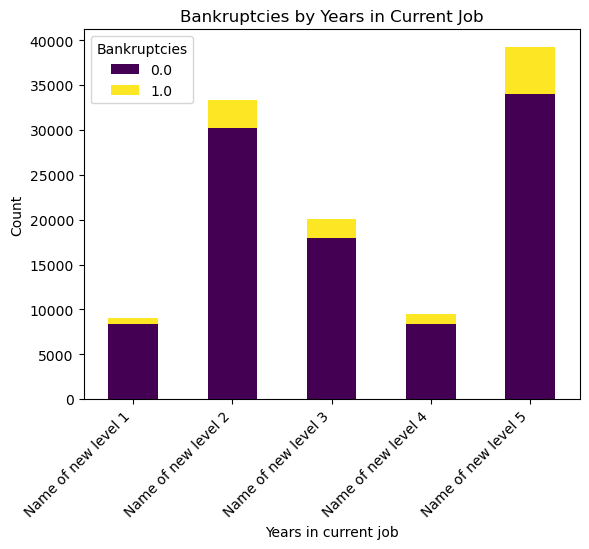

In [72]:
cross_tab = pd.crosstab(df['Years in current job'], df['Bankruptcies'])

# Plot a stacked bar plot
cross_tab.plot(kind='bar', stacked=True, colormap='viridis')

plt.xlabel('Years in current job')
plt.ylabel('Count')
plt.title('Bankruptcies by Years in Current Job')
# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

plt.show()

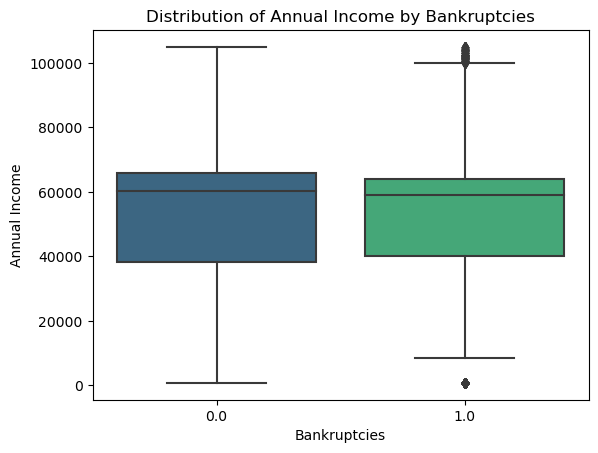

In [73]:
sns.boxplot(x='Bankruptcies', y='Annual Income', data=df, palette='viridis')

plt.xlabel('Bankruptcies')
plt.ylabel('Annual Income')
plt.title('Distribution of Annual Income by Bankruptcies')
plt.show()

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  111107 non-null  float64
 6   Years in current job          111107 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 111107 non-null  float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  object 
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  111107 non-nul

In [75]:
value_count = df['Home Ownership'].value_counts()
value_count

Home Ownership
Home Mortgage    53818
Rent             46868
Own Home         10188
HaveMortgage       233
Name: count, dtype: int64

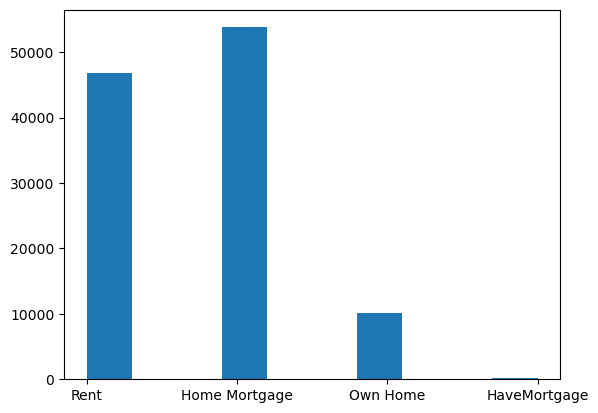

In [76]:
plt.hist(df['Home Ownership'])
plt.show()

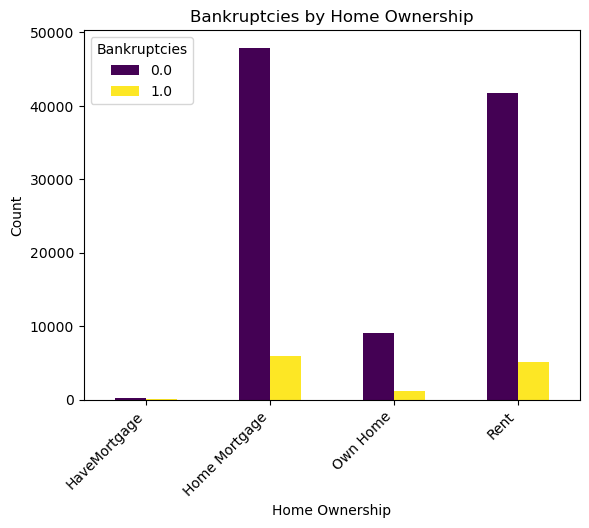

In [77]:
cross_tab = pd.crosstab(df['Home Ownership'], df['Bankruptcies'])
cross_tab.plot(kind='bar', colormap='viridis')

plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Bankruptcies by Home Ownership')
plt.xticks(rotation=45)
plt.show()

In [78]:
df['Purpose'].value_counts()

Purpose
Debt Consolidation      87277
other                    6671
Home Improvements        6504
Other                    3595
Business Loan            1749
Buy a Car                1422
Medical Bills            1259
Buy House                 758
Take a Trip               622
major_purchase            407
small_business            318
moving                    167
wedding                   126
Educational Expenses      114
vacation                  107
renewable_energy           11
Name: count, dtype: int64

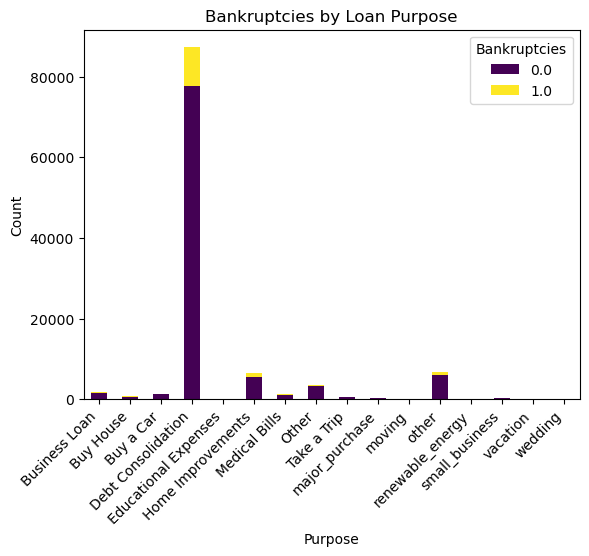

In [79]:
cross_tab = pd.crosstab(df['Purpose'], df['Bankruptcies'])
cross_tab.plot(kind='bar', stacked=True, colormap='viridis')

plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Bankruptcies by Loan Purpose')
plt.xticks(rotation=45)
plt.show()

In [82]:
df['Number of Open Accounts'].value_counts()

Number of Open Accounts
9     10350
10    10075
8      9803
11     9547
7      9057
12     8235
6      7523
13     6899
14     5766
5      5246
15     4739
16     3916
17     3186
4      3176
18     2466
19     2094
20     1576
3      1504
21     1218
22      933
23      764
24      612
2       483
25      458
26      309
27      288
28      181
29      135
30      122
31       84
32       70
33       60
34       42
36       29
1        27
35       27
37       18
38       14
43       12
40       10
39       10
41        8
45        6
42        6
47        5
44        5
48        4
52        2
56        2
0         2
76        2
55        1
Name: count, dtype: int64

In [81]:
df['Number of Credit Problems'].value_counts()

Number of Credit Problems
0     95642
1     13366
2      1444
3       418
4       135
5        59
6        19
7         8
9         5
8         4
10        3
11        2
12        1
15        1
Name: count, dtype: int64

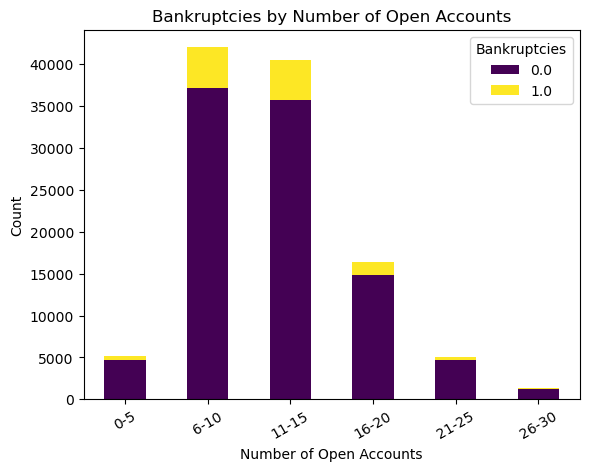

In [87]:
bins = [0, 5, 10, 15, 20, 25, 30]  # Adjust the bin edges as needed
labels = ['0-5', '6-10', '11-15', '16-20',
          '21-25', '26-30']  # set the range of number of account

# Create a new column with bins
df['Open Accounts Bins'] = pd.cut(
    df['Number of Open Accounts'], bins=bins, labels=labels, right=False)

# Create a cross-tabulation
cross_tab = pd.crosstab(df['Open Accounts Bins'], df['Bankruptcies'])

# Plot a grouped bar plot
cross_tab.plot(kind='bar', stacked=True, colormap='viridis')

plt.xlabel('Number of Open Accounts')
plt.ylabel('Count')
plt.title('Bankruptcies by Number of Open Accounts')
plt.xticks(rotation=30)
plt.show()

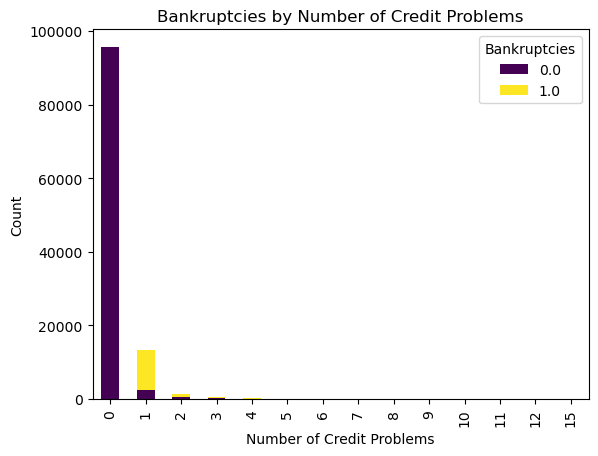

In [86]:
cross_tab = pd.crosstab(df['Number of Credit Problems'], df['Bankruptcies'])
cross_tab.plot(kind='bar', stacked=True, colormap='viridis')

plt.xlabel('Number of Credit Problems')
plt.ylabel('Count')
plt.title('Bankruptcies by Number of Credit Problems')

plt.show()